If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric bin ranges, then use cut .

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. There are several different terms for binning including bucketing, discrete binning, discretization or quantization. Pandas supports these approaches using the cut and qcut functions. This article will briefly describe why you may want to bin your data and how to use the pandas functions to convert continuous data to a set of discrete buckets. Like many pandas functions, cut and qcut may seem simple but there is a lot of capability packed into those functions. Even for more experience users, I think you will learn a couple of tricks that will be useful for your own analysis.

#How to bin a numeric series to 10 groups of equal size?

In [3]:
import pandas as pd
import numpy as np
# input
ser = pd.Series(np.random.random(20))
ser

0     0.446842
1     0.684611
2     0.655941
3     0.443577
4     0.018072
5     0.595893
6     0.596352
7     0.155313
8     0.296822
9     0.355260
10    0.139610
11    0.217326
12    0.608250
13    0.721016
14    0.570818
15    0.082776
16    0.393650
17    0.113294
18    0.219329
19    0.729839
dtype: float64

In [7]:
pd.qcut(ser, q = 10)


0     (0.419, 0.496]
1     (0.618, 0.688]
2     (0.618, 0.688]
3     (0.419, 0.496]
4     (0.0171, 0.11]
5     (0.496, 0.596]
6     (0.596, 0.618]
7     (0.152, 0.219]
8     (0.219, 0.332]
9     (0.332, 0.419]
10     (0.11, 0.152]
11    (0.152, 0.219]
12    (0.596, 0.618]
13     (0.688, 0.73]
14    (0.496, 0.596]
15    (0.0171, 0.11]
16    (0.332, 0.419]
17     (0.11, 0.152]
18    (0.219, 0.332]
19     (0.688, 0.73]
dtype: category
Categories (10, interval[float64]): [(0.0171, 0.11] < (0.11, 0.152] < (0.152, 0.219] < (0.219, 0.332] ... (0.496, 0.596] < (0.596, 0.618] < (0.618, 0.688] < (0.688, 0.73]]

In [8]:
# we can also pass labels
pd.qcut(ser, q = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1], labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']).head()

0    6th
1    9th
2    9th
3    6th
4    1st
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

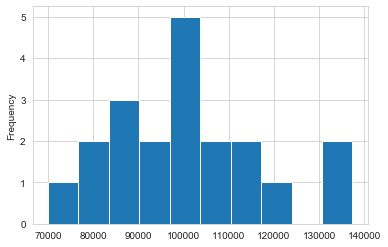

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

raw_df = pd.read_excel('2018_Sales_Total.xlsx')
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

df['ext price'].plot(kind='hist')

There are many other scenarios where you may want to define your own bins. In the example above, there are 8 bins with data. What if we wanted to divide our customers into 3, 4 or 5 groupings? That’s where pandas qcut and cut come into play. These functions sound similar and perform similar binning functions but have differences that might be confusing to new users. They also have several options that can make them very useful for day to day analysis. The rest of the article will show what their differences are and how to use them.

qcut

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

If you have used the pandas describe function, you have already seen an example of the underlying concepts represented by qcut :

In [11]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

Keep in mind the values for the 25%, 50% and 75% percentiles as we look at using qcut directly.

The simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data. In the example below, we tell pandas to create 4 equal sized groupings of the data.

In [12]:
pd.qcut(df['ext price'], q=4)

0       (70004.359, 89137.708]
1      (89137.708, 100271.535]
2       (70004.359, 89137.708]
3      (110132.552, 137351.96]
4      (89137.708, 100271.535]
5      (89137.708, 100271.535]
6       (70004.359, 89137.708]
7     (100271.535, 110132.552]
8      (110132.552, 137351.96]
9      (110132.552, 137351.96]
10     (89137.708, 100271.535]
11      (70004.359, 89137.708]
12      (70004.359, 89137.708]
13     (89137.708, 100271.535]
14    (100271.535, 110132.552]
15     (110132.552, 137351.96]
16    (100271.535, 110132.552]
17     (110132.552, 137351.96]
18    (100271.535, 110132.552]
19    (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

The result is a categorical series representing the sales bins. Because we asked for quantiles with q=4 the bins match the percentiles from the describe function.

A common use case is to store the bin results back in the original dataframe for future analysis. For this example, we will create 4 bins (aka quartiles) and 10 bins (aka deciles) and store the results back in the original dataframe:

In [14]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


You can see how the bins are very different between quantile_ex_1 and quantile_ex_2 . I also introduced the use of precision to define how many decimal points to use for calculating the bin precision.

The other interesting view is to see how the values are distributed across the bins using value_counts :

In [16]:
df['quantile_ex_1'].value_counts()

(110132.552, 137351.96]     5
(100271.535, 110132.552]    5
(89137.708, 100271.535]     5
(70004.359, 89137.708]      5
Name: quantile_ex_1, dtype: int64

Now, for the second column:

In [17]:
df['quantile_ex_2'].value_counts()

(124627.0, 137352.0]    2
(112290.0, 124627.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(82368.0, 87168.0]      2
(70003.0, 82368.0]      2
Name: quantile_ex_2, dtype: int64

This illustrates a key concept. In each case, there are an equal number of observations in each bin. Pandas does the math behind the scenes to figure out how wide to make each bin. For instance, in quantile_ex_1 the range of the first bin is 74,661.15 while the second bin is only 9,861.02 (110132 - 100271).

One of the challenges with this approach is that the bin labels are not very easy to explain to an end user. For instance, if we wanted to divide our customers into 5 groups (aka quintiles) like an airline frequent flier approach, we can explicitly label the bins to make them easier to interpret.

In [18]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In the example above, I did somethings a little differently. First, I explicitly defined the range of quantiles to use: q=[0, .2, .4, .6, .8, 1] . I also defined the labels labels=bin_labels_5 to use when representing the bins.

Let’s check the distribution:

In [19]:
df['quantile_ex_3'].value_counts()

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

As expected, we now have an equal distribution of customers across the 5 bins and the results are displayed in an easy to understand manner.

One important item to keep in mind when using qcut is that the quantiles must all be less than 1. Here are some examples of distributions. In most cases it’s simpler to just define q as an integer:

terciles: q=[0, 1/3, 2/3, 1] or q=3
quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6
One question you might have is, how do I know what ranges are used to identify the different bins? You can use retbins=True to return the bin labels. Here’s a handy snippet of code to build a quick reference table:

In [21]:
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])

Here is another trick that I learned while doing this article. If you try df.describe on categorical values, you get different summary results:

In [22]:
df.describe(include='category')

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
freq,5,2,4


I think this is useful and also a good summary of how qcut works.

While we are discussing describe we can using the percentiles argument to define our percentiles using the same format we used for qcut :

In [23]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,100939.216000
std,231499.208970,17675.097485
min,141962.000000,70004.360000
0%,141962.000000,70004.360000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,137351.960000
max,786968.000000,137351.960000


There is one minor note about this functionality. Passing 0 or 1, just means that the 0% will be the same as the min and 100% will be same as the max. I also learned that the 50th percentile will always be included, regardless of the values passed.

Before we move on to describing cut , there is one more potential way that we can label our bins. Instead of the bin ranges or custom labels, we can return integers by passing labels=False

In [24]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1


Personally, I think using bin_labels is the most useful scenario but there could be cases where the integer response might be helpful so I wanted to explicitly point it out.

cut
Now that we have discussed how to use qcut , we can show how cut is different. Many of the concepts we discussed above apply but there are a couple of differences with the usage of cut .

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins that are of constant size and let pandas figure out how to define those bin edges.

Some examples should make this distinction clear.

For the sake of simplicity, I am removing the previous columns to keep the examples short:

In [25]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])

For the first example, we can cut the data into 4 equal bin sizes. Pandas will perform the math behind the scenes to determine how to divide the data set into these 4 groups:

In [26]:
pd.cut(df['ext price'], bins=4)

0      (69937.012, 86841.26]
1      (86841.26, 103678.16]
2      (69937.012, 86841.26]
3     (120515.06, 137351.96]
4      (86841.26, 103678.16]
5      (86841.26, 103678.16]
6      (69937.012, 86841.26]
7     (103678.16, 120515.06]
8     (103678.16, 120515.06]
9     (120515.06, 137351.96]
10     (86841.26, 103678.16]
11     (69937.012, 86841.26]
12     (86841.26, 103678.16]
13     (86841.26, 103678.16]
14     (86841.26, 103678.16]
15    (120515.06, 137351.96]
16     (86841.26, 103678.16]
17    (103678.16, 120515.06]
18    (103678.16, 120515.06]
19     (86841.26, 103678.16]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(69937.012, 86841.26] < (86841.26, 103678.16] < (103678.16, 120515.06] < (120515.06, 137351.96]]

Lets look at distribution

In [27]:
pd.cut(df['ext price'], bins=4).value_counts()

(86841.26, 103678.16]     9
(103678.16, 120515.06]    4
(69937.012, 86841.26]     4
(120515.06, 137351.96]    3
Name: ext price, dtype: int64

You’ll notice is that the bin ranges are all about 32,265 but that the distribution of bin elements is not equal. The bins have a distribution of 12, 5, 2 and 1 item(s) in each bin. In a nutshell, that is the essential difference between cut and qcut .